In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import time

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

import datetime

# 原始資料

In [2]:
df = pd.read_csv(rf'C:\Users\Student\Desktop\ML_total_industry_lastest_v3.csv',index_col=False)
df

,company_id,company_name,year,pre_tax_income,income_tax_expense,cont_oper_IL,discont_oper_IL,profit,other_comprehensive_income,total_comprehensive_income,...,parent_equity,control_interest,non_control_interest,total_equity,proceeds_issued,total_treasury_shares,book_value_per_share,cash_dividend,stock_dividend,dividend_value
0,1101,台泥,2001,223575.0,33000.0,190575.0,0.0,190575.0,NaN,NaN,...,44142550.0,NaN,0.0,44142550.0,0.0,0.0,16.93,0.000000,0.000000,0.000000
1,1101,台泥,2002,316737.0,30000.0,286737.0,0.0,286737.0,NaN,NaN,...,48046279.0,NaN,0.0,48046279.0,0.0,12270.0,18.17,0.100000,0.200000,0.346000
2,1101,台泥,2003,2232182.0,470000.0,1762182.0,0.0,1762182.0,NaN,NaN,...,48887732.0,NaN,0.0,48887732.0,0.0,12515.0,18.12,0.350000,0.350000,0.990500
3,1101,台泥,2004,4653526.0,232000.0,4421526.0,0.0,4421526.0,NaN,NaN,...,52105463.0,NaN,0.0,52105463.0,0.0,12953.0,18.63,0.700000,0.500000,1.722500
4,1101,台泥,2005,6085844.0,309549.0,5776295.0,-72928.0,5703367.0,NaN,NaN,...,56420387.0,0.0,NaN,56420387.0,0.0,13601.0,18.94,1.405943,0.156216,1.801169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27471,5876,上海商銀,2016,19219160.0,4107035.0,15112125.0,0.0,15112125.0,-343702.0,14768423.0,...,120233504.0,0.0,42788926.0,163022430.0,0.0,11397.0,29.56,1.500000,0.000000,1.500000
27472,5876,上海商銀,2017,21208877.0,4589911.0,16618966.0,0.0,16618966.0,-8954570.0,7664396.0,...,122409799.0,0.0,40623295.0,163033094.0,0.0,11397.0,30.09,1.800000,0.000000,1.800000
27473,5876,上海商銀,2018,22936681.0,4575035.0,18361646.0,0.0,18361646.0,3774261.0,22135907.0,...,131155947.0,0.0,46865979.0,178021926.0,0.0,11397.0,32.07,2.000000,0.000000,2.000000
27474,5876,上海商銀,2019,24630823.0,4906344.0,19724479.0,0.0,19724479.0,2047686.0,21772165.0,...,153567619.0,0.0,50658706.0,204226325.0,0.0,11397.0,34.35,2.050000,0.000000,2.050000


In [3]:
df.shape

(27476, 34)

# 查看原始資料空值欄位

In [4]:
df.isnull().sum()

company_id                              0
company_name                            0
year                                    0
pre_tax_income                          0
income_tax_expense                      0
cont_oper_IL                            0
discont_oper_IL                         0
profit                                  0
other_comprehensive_income          12823
total_comprehensive_income          12823
parent_PL                               0
jointly_control_PL                   3847
non_control_PL                       3901
parent_comprehensive_income         12823
control_comprehensive_income        12823
non_control_comprehensive_income    12823
earning_per_share                      10
total_assets                            0
total_liabilities                       0
stocks                                  9
capital_reserve                         0
retained_earnings                       0
other_equity_interest                   9
treasury_stock                    

In [5]:
# 刪除包含空值資料
df = df.dropna(subset = ['earning_per_share','stocks'])

In [6]:
# 刪除多數空值欄位
df = df.drop(['other_comprehensive_income','total_comprehensive_income','parent_comprehensive_income',
                'control_comprehensive_income','non_control_comprehensive_income'],axis = 1)

In [7]:
# 欄位空值補0
values={'jointly_control_PL':0,'non_control_PL':0,'control_interest':0,'non_control_interest':0}
df=df.fillna(values)


In [8]:
# 補上 2012年 6113 的 total_treasury_shares (庫藏股數（母持及子持母）) 為5560
df['total_treasury_shares'][19581] = 5560

<ipython-input-8-87649b6e8cdb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_treasury_shares'][19581] = 5560


In [9]:
df.isnull().sum()

company_id               0
company_name             0
year                     0
pre_tax_income           0
income_tax_expense       0
cont_oper_IL             0
discont_oper_IL          0
profit                   0
parent_PL                0
jointly_control_PL       0
non_control_PL           0
earning_per_share        0
total_assets             0
total_liabilities        0
stocks                   0
capital_reserve          0
retained_earnings        0
other_equity_interest    0
treasury_stock           0
parent_equity            0
control_interest         0
non_control_interest     0
total_equity             0
proceeds_issued          0
total_treasury_shares    0
book_value_per_share     0
cash_dividend            0
stock_dividend           0
dividend_value           0
dtype: int64

In [10]:
df

,company_id,company_name,year,pre_tax_income,income_tax_expense,cont_oper_IL,discont_oper_IL,profit,parent_PL,jointly_control_PL,...,parent_equity,control_interest,non_control_interest,total_equity,proceeds_issued,total_treasury_shares,book_value_per_share,cash_dividend,stock_dividend,dividend_value
0,1101,台泥,2001,223575.0,33000.0,190575.0,0.0,190575.0,190575.0,0.0,...,44142550.0,0.0,0.0,44142550.0,0.0,0.0,16.93,0.000000,0.000000,0.000000
1,1101,台泥,2002,316737.0,30000.0,286737.0,0.0,286737.0,286737.0,0.0,...,48046279.0,0.0,0.0,48046279.0,0.0,12270.0,18.17,0.100000,0.200000,0.346000
2,1101,台泥,2003,2232182.0,470000.0,1762182.0,0.0,1762182.0,1762182.0,0.0,...,48887732.0,0.0,0.0,48887732.0,0.0,12515.0,18.12,0.350000,0.350000,0.990500
3,1101,台泥,2004,4653526.0,232000.0,4421526.0,0.0,4421526.0,4421526.0,0.0,...,52105463.0,0.0,0.0,52105463.0,0.0,12953.0,18.63,0.700000,0.500000,1.722500
4,1101,台泥,2005,6085844.0,309549.0,5776295.0,-72928.0,5703367.0,5703367.0,0.0,...,56420387.0,0.0,0.0,56420387.0,0.0,13601.0,18.94,1.405943,0.156216,1.801169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27471,5876,上海商銀,2016,19219160.0,4107035.0,15112125.0,0.0,15112125.0,11748332.0,0.0,...,120233504.0,0.0,42788926.0,163022430.0,0.0,11397.0,29.56,1.500000,0.000000,1.500000
27472,5876,上海商銀,2017,21208877.0,4589911.0,16618966.0,0.0,16618966.0,12385227.0,0.0,...,122409799.0,0.0,40623295.0,163033094.0,0.0,11397.0,30.09,1.800000,0.000000,1.800000
27473,5876,上海商銀,2018,22936681.0,4575035.0,18361646.0,0.0,18361646.0,13711971.0,0.0,...,131155947.0,0.0,46865979.0,178021926.0,0.0,11397.0,32.07,2.000000,0.000000,2.000000
27474,5876,上海商銀,2019,24630823.0,4906344.0,19724479.0,0.0,19724479.0,14661111.0,0.0,...,153567619.0,0.0,50658706.0,204226325.0,0.0,11397.0,34.35,2.050000,0.000000,2.050000


In [11]:
# df1.to_csv(r'C:\Users\Student\Desktop\test123.csv')

In [12]:
df.columns

Index(['company_id', 'company_name', 'year', 'pre_tax_income',
       'income_tax_expense', 'cont_oper_IL', 'discont_oper_IL', 'profit',
       'parent_PL', 'jointly_control_PL', 'non_control_PL',
       'earning_per_share', 'total_assets', 'total_liabilities', 'stocks',
       'capital_reserve', 'retained_earnings', 'other_equity_interest',
       'treasury_stock', 'parent_equity', 'control_interest',
       'non_control_interest', 'total_equity', 'proceeds_issued',
       'total_treasury_shares', 'book_value_per_share', 'cash_dividend',
       'stock_dividend', 'dividend_value'],
      dtype='object')

In [13]:
df.shape

(27457, 29)

In [14]:
mask = (df['cash_dividend']>0)

In [15]:
df_nonzero =df[mask]

In [16]:
df_nonzero.shape

(19000, 29)

In [17]:
df_zero = df[~mask]

In [18]:
df_zero.shape

(8457, 29)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
df_zero_del, df_zero_save =  train_test_split(df_zero,test_size=0.12,random_state=42)

In [21]:
df_zero_save.shape

(1015, 29)

In [22]:
df = pd.concat([df_nonzero,df_zero_save],axis = 0)

In [23]:
df.shape

(20015, 29)

In [24]:
df = df[df['cash_dividend'] <20]

# 除權息移除倒數三位的其中兩位

In [25]:
df

,company_id,company_name,year,pre_tax_income,income_tax_expense,cont_oper_IL,discont_oper_IL,profit,parent_PL,jointly_control_PL,...,parent_equity,control_interest,non_control_interest,total_equity,proceeds_issued,total_treasury_shares,book_value_per_share,cash_dividend,stock_dividend,dividend_value
1,1101,台泥,2002,316737.0,30000.0,286737.0,0.0,286737.0,286737.0,0.0,...,48046279.0,0.0,0.0,48046279.0,0.0,12270.0,18.17,0.100000,0.200000,0.346000
2,1101,台泥,2003,2232182.0,470000.0,1762182.0,0.0,1762182.0,1762182.0,0.0,...,48887732.0,0.0,0.0,48887732.0,0.0,12515.0,18.12,0.350000,0.350000,0.990500
3,1101,台泥,2004,4653526.0,232000.0,4421526.0,0.0,4421526.0,4421526.0,0.0,...,52105463.0,0.0,0.0,52105463.0,0.0,12953.0,18.63,0.700000,0.500000,1.722500
4,1101,台泥,2005,6085844.0,309549.0,5776295.0,-72928.0,5703367.0,5703367.0,0.0,...,56420387.0,0.0,0.0,56420387.0,0.0,13601.0,18.94,1.405943,0.156216,1.801169
5,1101,台泥,2006,6943508.0,32000.0,6911508.0,-33865.0,6877643.0,6877643.0,0.0,...,67042840.0,0.0,0.0,67042840.0,0.0,0.0,21.34,1.700000,0.100000,2.110000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,1615,大山,2002,16701.0,-17200.0,33901.0,0.0,33901.0,33901.0,0.0,...,1051796.0,0.0,0.0,1051796.0,0.0,0.0,11.93,0.000000,0.000000,0.000000
1878,1472,三洋實業,2018,-70249.0,-2293.0,-67956.0,0.0,-67956.0,-67956.0,0.0,...,311302.0,0.0,0.0,311302.0,0.0,0.0,7.30,0.000000,0.000000,0.000000
17604,5302,太欣,2012,-38266.0,0.0,-38266.0,0.0,-38266.0,-38266.0,0.0,...,1813787.0,0.0,0.0,1813787.0,0.0,2489.0,6.62,0.000000,0.000000,0.000000
10022,3027,盛達,2017,-231813.0,-2064.0,-229749.0,0.0,-229749.0,-228657.0,0.0,...,1292980.0,0.0,10928.0,1303908.0,0.0,239.0,13.08,0.000000,0.000000,0.000000


In [26]:
df.shape

(19961, 29)

In [27]:
# df3 = df2.iloc[: , 3:]
# df3

In [28]:

# df = df.dropna()

# # del df['company_name']

df1 = df.iloc[: , 3:]
# del df1['cash_dividend']
del df1['stock_dividend']
del df1['dividend_value']



df1



,pre_tax_income,income_tax_expense,cont_oper_IL,discont_oper_IL,profit,parent_PL,jointly_control_PL,non_control_PL,earning_per_share,total_assets,...,other_equity_interest,treasury_stock,parent_equity,control_interest,non_control_interest,total_equity,proceeds_issued,total_treasury_shares,book_value_per_share,cash_dividend
1,316737.0,30000.0,286737.0,0.0,286737.0,286737.0,0.0,0.0,0.02,101027776.0,...,-201916.0,-113868.0,48046279.0,0.0,0.0,48046279.0,0.0,12270.0,18.17,0.100000
2,2232182.0,470000.0,1762182.0,0.0,1762182.0,1762182.0,0.0,0.0,0.60,94574148.0,...,-516542.0,-113868.0,48887732.0,0.0,0.0,48887732.0,0.0,12515.0,18.12,0.350000
3,4653526.0,232000.0,4421526.0,0.0,4421526.0,4421526.0,0.0,0.0,1.59,94158098.0,...,-295004.0,-113868.0,52105463.0,0.0,0.0,52105463.0,0.0,12953.0,18.63,0.700000
4,6085844.0,309549.0,5776295.0,-72928.0,5703367.0,5703367.0,0.0,0.0,1.97,91813352.0,...,9580801.0,-113868.0,56420387.0,0.0,0.0,56420387.0,0.0,13601.0,18.94,1.405943
5,6943508.0,32000.0,6911508.0,-33865.0,6877643.0,6877643.0,0.0,0.0,2.20,97334326.0,...,17123656.0,0.0,67042840.0,0.0,0.0,67042840.0,0.0,0.0,21.34,1.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3013,16701.0,-17200.0,33901.0,0.0,33901.0,33901.0,0.0,0.0,0.38,2167318.0,...,0.0,0.0,1051796.0,0.0,0.0,1051796.0,0.0,0.0,11.93,0.000000
1878,-70249.0,-2293.0,-67956.0,0.0,-67956.0,-67956.0,0.0,0.0,-1.59,855934.0,...,-1751.0,0.0,311302.0,0.0,0.0,311302.0,0.0,0.0,7.30,0.000000
17604,-38266.0,0.0,-38266.0,0.0,-38266.0,-38266.0,0.0,0.0,-0.24,2220478.0,...,-4052.0,-44417.0,1813787.0,0.0,0.0,1813787.0,0.0,2489.0,6.62,0.000000
10022,-231813.0,-2064.0,-229749.0,0.0,-229749.0,-228657.0,0.0,-1092.0,-2.31,2133019.0,...,-20969.0,-2674.0,1292980.0,0.0,10928.0,1303908.0,0.0,239.0,13.08,0.000000


In [29]:
df1.shape

(19961, 24)

In [30]:
# df1.to_csv(r'C:\Users\Student\Desktop\test5566.csv')

In [31]:
column_feature = list(df1.columns)
# len(column_feature)
list(df1.columns)

# 將最後一欄當成預測欄位所以要把最後一欄位pop掉
column_feature.pop()

print(column_feature)

['pre_tax_income', 'income_tax_expense', 'cont_oper_IL', 'discont_oper_IL', 'profit', 'parent_PL', 'jointly_control_PL', 'non_control_PL', 'earning_per_share', 'total_assets', 'total_liabilities', 'stocks', 'capital_reserve', 'retained_earnings', 'other_equity_interest', 'treasury_stock', 'parent_equity', 'control_interest', 'non_control_interest', 'total_equity', 'proceeds_issued', 'total_treasury_shares', 'book_value_per_share']


In [32]:
len(df1.columns)

24

In [33]:
X = df1.iloc[:,:-1].values
y= df1.iloc[:,-1].values
X2 = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test =  train_test_split(X2, y,test_size=0.3, random_state=42
                                                )
# X特徵集 y預測的東西放到y裡面

In [34]:
X

array([[ 3.167370e+05,  3.000000e+04,  2.867370e+05, ...,  0.000000e+00,
         1.227000e+04,  1.817000e+01],
       [ 2.232182e+06,  4.700000e+05,  1.762182e+06, ...,  0.000000e+00,
         1.251500e+04,  1.812000e+01],
       [ 4.653526e+06,  2.320000e+05,  4.421526e+06, ...,  0.000000e+00,
         1.295300e+04,  1.863000e+01],
       ...,
       [-3.826600e+04,  0.000000e+00, -3.826600e+04, ...,  0.000000e+00,
         2.489000e+03,  6.620000e+00],
       [-2.318130e+05, -2.064000e+03, -2.297490e+05, ...,  0.000000e+00,
         2.390000e+02,  1.308000e+01],
       [-4.054670e+05, -6.471900e+04, -3.407480e+05, ...,  0.000000e+00,
         0.000000e+00,  1.016000e+01]])

In [35]:
y

array([0.1 , 0.35, 0.7 , ..., 0.  , 0.  , 0.  ])

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
start = datetime.datetime.now()
# rfr = RandomForestRegressor(n_estimators= 1200, random_state=1,n_jobs=-1,min_samples_leaf=10,max_depth=10)
rfr = RandomForestRegressor(n_estimators= 20 , 
                            random_state=42,
                            n_jobs=-1,
#                             max_features=None,
#                             min_samples_leaf=5,
#                             max_depth=8,
                            max_depth=10,
                           )

# n_estimators=>決策數多少 random_state=>固定隨機樣子 n_jobs=>如有多核心處理器可以更快運算完成 
# min_samples_leaf=10  ==> 樹長完後 去修剪樹枝 在每個樹枝裡面還要包含10個資訊量 可以避免過度配飾
rfr.fit(X_train,y_train)

end = datetime.datetime.now()
print(end-start, '(時:分:秒)')

0:00:00.307125 (時:分:秒)


In [38]:
y_train_pred = rfr.predict(X_train)
y_test_pred = rfr.predict(X_test)
print('測試正確率: %.3f' % rfr.score(X_test, y_test))
print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
a = mean_squared_error(y_train, y_train_pred)
b = mean_squared_error(y_test, y_test_pred)
print('Overfitting: %.3f' %((b-a)*100/a)+'%')
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


測試正確率: 0.799
MSE train: 0.395, test: 0.863
Overfitting: 118.633%
R^2 train: 0.903, test: 0.799


In [39]:
y_test_pred[20:30]

array([0.56755513, 3.66398288, 1.63937516, 0.81974641, 0.729611  ,
       2.6622518 , 2.24031439, 2.42220642, 0.5034495 , 0.87099668])

In [40]:
y_test[20:30]

array([1.00000005, 3.8765    , 2.        , 1.2       , 0.7       ,
       3.        , 3.00140195, 1.5       , 0.3       , 1.49594409])

In [ ]:
#------------------------------------------

In [ ]:
# start = datetime.datetime.now()

# # rfr = RandomForestRegressor(n_estimators= 1200, random_state=1,n_jobs=-1,min_samples_leaf=10,max_depth=10)

# # list_n_estimators = [100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400 ]
# list_n_estimators = [1000,1200,1400]
# list_max_features = [None,1,2]
# list_min_samples_leaf = [1,5,6,7 ]
# list_max_depth = [1,2,3 ]



# for i in list_n_estimators:
#     for j in list_max_features:
#         for k in list_min_samples_leaf:
#             for l in list_max_depth:
#                 rfr = RandomForestRegressor(n_estimators= i, 
#                                             random_state=42,
#                                             n_jobs=-1,
#                                             max_features=j,
#                                             min_samples_leaf=k,
#                                             max_depth=l,
#                                            )

#                 # n_estimators=>決策數多少 random_state=>固定隨機樣子 n_jobs=>如有多核心處理器可以更快運算完成 
#                 # min_samples_leaf=10  ==> 樹長完後 去修剪樹枝 在每個樹枝裡面還要包含10個資訊量 可以避免過度配飾
#                 rfr.fit(X_train,y_train)
                
                
#                 y_train_pred = rfr.predict(X_train)
#                 y_test_pred = rfr.predict(X_test)
                
#                 a = mean_squared_error(y_train, y_train_pred)
#                 b = mean_squared_error(y_test, y_test_pred)

#                 if  0 <(b-a)/a < 0.1 and rfr.score(X_test, y_test)>=0.7:
#                     print("-"*50)
#                     print('n_estimators = ',i)
#                     print('max_features = ',j)
#                     print('min_samples_leaf = ',k)
#                     print('max_depth = ',l)
                    

#                     print('測試正確率: %.3f' % rfr.score(X_test, y_test))
#                     print('MSE train: %.3f, test: %.3f' % (
#                             mean_squared_error(y_train, y_train_pred),
#                             mean_squared_error(y_test, y_test_pred)))
#                     a = mean_squared_error(y_train, y_train_pred)
#                     b = mean_squared_error(y_test, y_test_pred)
#                     print('Overfitting: %.3f' %((b-a)*100/a)+'%')
#                     print('R^2 train: %.3f, test: %.3f' % (
#                             r2_score(y_train, y_train_pred),
#                             r2_score(y_test, y_test_pred)))
    

# end = datetime.datetime.now()
# print(end-start, '(時:分:秒)')

In [ ]:
#------------------------------------------

In [ ]:
# start = datetime.datetime.now()
# # rfr = RandomForestRegressor(n_estimators= 1200, random_state=1,n_jobs=-1,min_samples_leaf=10,max_depth=10)
# rfr = RandomForestRegressor(n_estimators= 800, 
#                             random_state=42,
#                             n_jobs=-1,
#                             max_features='auto',
#                             min_samples_leaf=4,
#                             max_depth=5,
#                            )

# # n_estimators=>決策數多少 random_state=>固定隨機樣子 n_jobs=>如有多核心處理器可以更快運算完成 
# # min_samples_leaf=10  ==> 樹長完後 去修剪樹枝 在每個樹枝裡面還要包含10個資訊量 可以避免過度配飾
# rfr.fit(X_train,y_train)

# end = datetime.datetime.now()
# print(end-start, '(時:分:秒)')

In [ ]:
# y_train_pred = rfr.predict(X_train)
# y_test_pred = rfr.predict(X_test)
# print('測試正確率: %.3f' % rfr.score(X_test, y_test))
# print('MSE train: %.3f, test: %.3f' % (
#         mean_squared_error(y_train, y_train_pred),
#         mean_squared_error(y_test, y_test_pred)))
# a = mean_squared_error(y_train, y_train_pred)
# b = mean_squared_error(y_test, y_test_pred)
# print('Overfitting: %.3f' %((b-a)*100/a)+'%')
# print('R^2 train: %.3f, test: %.3f' % (
#         r2_score(y_train, y_train_pred),
#         r2_score(y_test, y_test_pred)))


<AxesSubplot:>

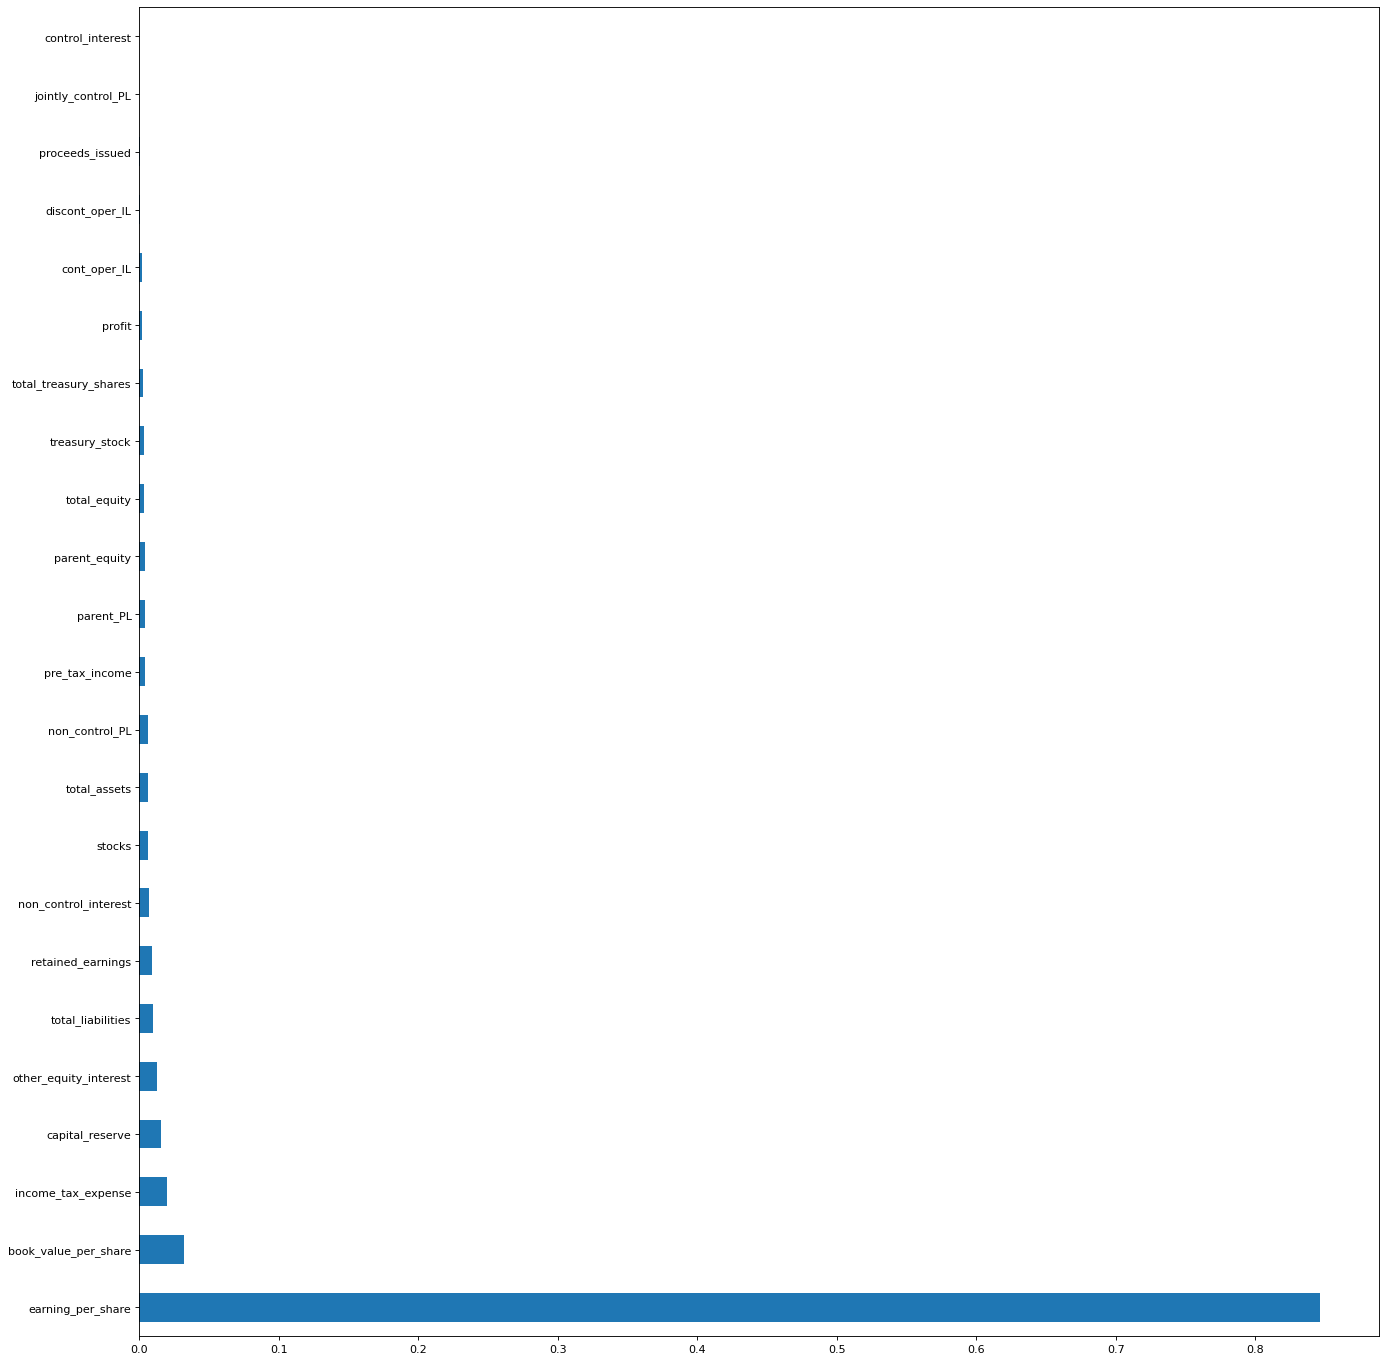

In [41]:
plt.figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(rfr.feature_importances_, index= column_feature)
feat_importances.nlargest(56).plot(kind='barh')

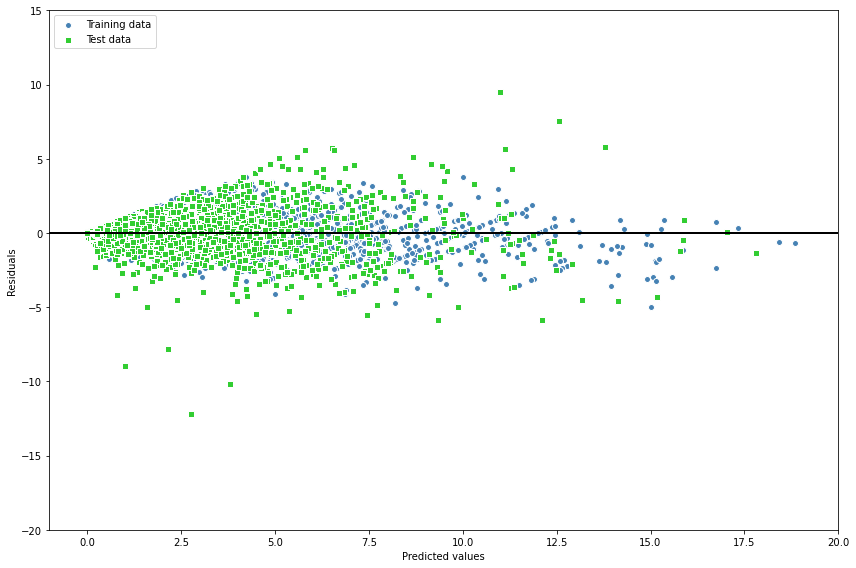

In [42]:
#殘插圖
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=1000, color='black', lw=2)
plt.xlim([-1,20])
plt.ylim([-20,15])


plt.tight_layout(rect=(0,0,2,2))

# plt.savefig('demo6_1.png', dpi=300)
plt.show()

In [43]:
# 預測真實情況

In [44]:
df = pd.read_csv(rf'C:\Users\Student\Desktop\ML_total_industry_lastest_v3.csv',index_col=False)
df

,company_id,company_name,year,pre_tax_income,income_tax_expense,cont_oper_IL,discont_oper_IL,profit,other_comprehensive_income,total_comprehensive_income,...,parent_equity,control_interest,non_control_interest,total_equity,proceeds_issued,total_treasury_shares,book_value_per_share,cash_dividend,stock_dividend,dividend_value
0,1101,台泥,2001,223575.0,33000.0,190575.0,0.0,190575.0,NaN,NaN,...,44142550.0,NaN,0.0,44142550.0,0.0,0.0,16.93,0.000000,0.000000,0.000000
1,1101,台泥,2002,316737.0,30000.0,286737.0,0.0,286737.0,NaN,NaN,...,48046279.0,NaN,0.0,48046279.0,0.0,12270.0,18.17,0.100000,0.200000,0.346000
2,1101,台泥,2003,2232182.0,470000.0,1762182.0,0.0,1762182.0,NaN,NaN,...,48887732.0,NaN,0.0,48887732.0,0.0,12515.0,18.12,0.350000,0.350000,0.990500
3,1101,台泥,2004,4653526.0,232000.0,4421526.0,0.0,4421526.0,NaN,NaN,...,52105463.0,NaN,0.0,52105463.0,0.0,12953.0,18.63,0.700000,0.500000,1.722500
4,1101,台泥,2005,6085844.0,309549.0,5776295.0,-72928.0,5703367.0,NaN,NaN,...,56420387.0,0.0,NaN,56420387.0,0.0,13601.0,18.94,1.405943,0.156216,1.801169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27471,5876,上海商銀,2016,19219160.0,4107035.0,15112125.0,0.0,15112125.0,-343702.0,14768423.0,...,120233504.0,0.0,42788926.0,163022430.0,0.0,11397.0,29.56,1.500000,0.000000,1.500000
27472,5876,上海商銀,2017,21208877.0,4589911.0,16618966.0,0.0,16618966.0,-8954570.0,7664396.0,...,122409799.0,0.0,40623295.0,163033094.0,0.0,11397.0,30.09,1.800000,0.000000,1.800000
27473,5876,上海商銀,2018,22936681.0,4575035.0,18361646.0,0.0,18361646.0,3774261.0,22135907.0,...,131155947.0,0.0,46865979.0,178021926.0,0.0,11397.0,32.07,2.000000,0.000000,2.000000
27474,5876,上海商銀,2019,24630823.0,4906344.0,19724479.0,0.0,19724479.0,2047686.0,21772165.0,...,153567619.0,0.0,50658706.0,204226325.0,0.0,11397.0,34.35,2.050000,0.000000,2.050000


In [45]:
df_predict=df

In [46]:
df_predict.shape

(27476, 34)

In [47]:
df_predict = df_predict[df_predict['year']==2020].sort_values('company_id')
df_predict

,company_id,company_name,year,pre_tax_income,income_tax_expense,cont_oper_IL,discont_oper_IL,profit,other_comprehensive_income,total_comprehensive_income,...,parent_equity,control_interest,non_control_interest,total_equity,proceeds_issued,total_treasury_shares,book_value_per_share,cash_dividend,stock_dividend,dividend_value
19,1101,台泥,2020,35353306.0,7361913.0,27991393.0,0.0,27991393.0,-2495498.0,25495895.0,...,204071817.0,0.0,14758236.0,218830053.0,0.0,11522.0,34.41,3.368120,0.0,3.368120
39,1102,亞泥,2020,24143883.0,5370076.0,18773807.0,0.0,18773807.0,-1189331.0,17584476.0,...,147768559.0,0.0,22118393.0,169886952.0,0.0,0.0,43.96,3.462838,0.0,3.462838
59,1103,嘉泥,2020,2106042.0,269547.0,1836495.0,1499.0,1837994.0,300229.0,2138223.0,...,24182147.0,0.0,835202.0,25017349.0,0.0,131805.0,37.61,1.400000,0.0,1.400000
79,1104,環泥,2020,1297514.0,37719.0,1259795.0,0.0,1259795.0,79230.0,1339025.0,...,18656227.0,0.0,129126.0,18785353.0,0.0,0.0,28.54,1.100000,0.0,1.100000
99,1108,幸福,2020,444408.0,52139.0,392269.0,0.0,392269.0,4426.0,396695.0,...,4656845.0,0.0,74.0,4656919.0,0.0,0.0,11.51,0.700000,0.0,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26619,9951,皇田,2020,609024.0,107919.0,501105.0,0.0,501105.0,-10573.0,490532.0,...,3100358.0,0.0,0.0,3100358.0,0.0,0.0,41.39,4.700000,0.0,4.700000
26638,9955,佳龍,2020,-123733.0,-430.0,-123303.0,0.0,-123303.0,820.0,-122483.0,...,1589057.0,0.0,222.0,1589279.0,0.0,0.0,15.40,0.000000,0.0,0.000000
26657,9958,世紀鋼,2020,1476572.0,303575.0,1172997.0,0.0,1172997.0,39713.0,1212710.0,...,6954089.0,0.0,2382867.0,9336956.0,0.0,0.0,31.87,4.000000,0.0,4.000000
26676,9960,邁達康,2020,60269.0,12922.0,47347.0,0.0,47347.0,-3913.0,43434.0,...,481994.0,0.0,0.0,481994.0,0.0,0.0,14.35,1.000000,0.0,1.000000


In [48]:
df_company_id=df_predict
df_company_id_name= df_company_id.iloc[:,:3]
df_company_id_name

,company_id,company_name,year
19,1101,台泥,2020
39,1102,亞泥,2020
59,1103,嘉泥,2020
79,1104,環泥,2020
99,1108,幸福,2020
...,...,...,...
26619,9951,皇田,2020
26638,9955,佳龍,2020
26657,9958,世紀鋼,2020
26676,9960,邁達康,2020


In [49]:
df_predict.isnull().sum()

company_id                          0
company_name                        0
year                                0
pre_tax_income                      0
income_tax_expense                  0
cont_oper_IL                        0
discont_oper_IL                     0
profit                              0
other_comprehensive_income          0
total_comprehensive_income          0
parent_PL                           0
jointly_control_PL                  0
non_control_PL                      0
parent_comprehensive_income         0
control_comprehensive_income        0
non_control_comprehensive_income    0
earning_per_share                   0
total_assets                        0
total_liabilities                   0
stocks                              0
capital_reserve                     0
retained_earnings                   0
other_equity_interest               0
treasury_stock                      0
parent_equity                       0
control_interest                    0
non_control_

In [50]:
df_predict

,company_id,company_name,year,pre_tax_income,income_tax_expense,cont_oper_IL,discont_oper_IL,profit,other_comprehensive_income,total_comprehensive_income,...,parent_equity,control_interest,non_control_interest,total_equity,proceeds_issued,total_treasury_shares,book_value_per_share,cash_dividend,stock_dividend,dividend_value
19,1101,台泥,2020,35353306.0,7361913.0,27991393.0,0.0,27991393.0,-2495498.0,25495895.0,...,204071817.0,0.0,14758236.0,218830053.0,0.0,11522.0,34.41,3.368120,0.0,3.368120
39,1102,亞泥,2020,24143883.0,5370076.0,18773807.0,0.0,18773807.0,-1189331.0,17584476.0,...,147768559.0,0.0,22118393.0,169886952.0,0.0,0.0,43.96,3.462838,0.0,3.462838
59,1103,嘉泥,2020,2106042.0,269547.0,1836495.0,1499.0,1837994.0,300229.0,2138223.0,...,24182147.0,0.0,835202.0,25017349.0,0.0,131805.0,37.61,1.400000,0.0,1.400000
79,1104,環泥,2020,1297514.0,37719.0,1259795.0,0.0,1259795.0,79230.0,1339025.0,...,18656227.0,0.0,129126.0,18785353.0,0.0,0.0,28.54,1.100000,0.0,1.100000
99,1108,幸福,2020,444408.0,52139.0,392269.0,0.0,392269.0,4426.0,396695.0,...,4656845.0,0.0,74.0,4656919.0,0.0,0.0,11.51,0.700000,0.0,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26619,9951,皇田,2020,609024.0,107919.0,501105.0,0.0,501105.0,-10573.0,490532.0,...,3100358.0,0.0,0.0,3100358.0,0.0,0.0,41.39,4.700000,0.0,4.700000
26638,9955,佳龍,2020,-123733.0,-430.0,-123303.0,0.0,-123303.0,820.0,-122483.0,...,1589057.0,0.0,222.0,1589279.0,0.0,0.0,15.40,0.000000,0.0,0.000000
26657,9958,世紀鋼,2020,1476572.0,303575.0,1172997.0,0.0,1172997.0,39713.0,1212710.0,...,6954089.0,0.0,2382867.0,9336956.0,0.0,0.0,31.87,4.000000,0.0,4.000000
26676,9960,邁達康,2020,60269.0,12922.0,47347.0,0.0,47347.0,-3913.0,43434.0,...,481994.0,0.0,0.0,481994.0,0.0,0.0,14.35,1.000000,0.0,1.000000


In [51]:
# 刪除多數空值欄位
df_predict = df_predict.drop(['other_comprehensive_income','total_comprehensive_income','parent_comprehensive_income',
                'control_comprehensive_income','non_control_comprehensive_income'],axis = 1)

In [52]:
df_predict

,company_id,company_name,year,pre_tax_income,income_tax_expense,cont_oper_IL,discont_oper_IL,profit,parent_PL,jointly_control_PL,...,parent_equity,control_interest,non_control_interest,total_equity,proceeds_issued,total_treasury_shares,book_value_per_share,cash_dividend,stock_dividend,dividend_value
19,1101,台泥,2020,35353306.0,7361913.0,27991393.0,0.0,27991393.0,25099309.0,0.0,...,204071817.0,0.0,14758236.0,218830053.0,0.0,11522.0,34.41,3.368120,0.0,3.368120
39,1102,亞泥,2020,24143883.0,5370076.0,18773807.0,0.0,18773807.0,14710486.0,0.0,...,147768559.0,0.0,22118393.0,169886952.0,0.0,0.0,43.96,3.462838,0.0,3.462838
59,1103,嘉泥,2020,2106042.0,269547.0,1836495.0,1499.0,1837994.0,1764366.0,0.0,...,24182147.0,0.0,835202.0,25017349.0,0.0,131805.0,37.61,1.400000,0.0,1.400000
79,1104,環泥,2020,1297514.0,37719.0,1259795.0,0.0,1259795.0,1247252.0,0.0,...,18656227.0,0.0,129126.0,18785353.0,0.0,0.0,28.54,1.100000,0.0,1.100000
99,1108,幸福,2020,444408.0,52139.0,392269.0,0.0,392269.0,392269.0,0.0,...,4656845.0,0.0,74.0,4656919.0,0.0,0.0,11.51,0.700000,0.0,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26619,9951,皇田,2020,609024.0,107919.0,501105.0,0.0,501105.0,501105.0,0.0,...,3100358.0,0.0,0.0,3100358.0,0.0,0.0,41.39,4.700000,0.0,4.700000
26638,9955,佳龍,2020,-123733.0,-430.0,-123303.0,0.0,-123303.0,-123299.0,0.0,...,1589057.0,0.0,222.0,1589279.0,0.0,0.0,15.40,0.000000,0.0,0.000000
26657,9958,世紀鋼,2020,1476572.0,303575.0,1172997.0,0.0,1172997.0,935156.0,0.0,...,6954089.0,0.0,2382867.0,9336956.0,0.0,0.0,31.87,4.000000,0.0,4.000000
26676,9960,邁達康,2020,60269.0,12922.0,47347.0,0.0,47347.0,47347.0,0.0,...,481994.0,0.0,0.0,481994.0,0.0,0.0,14.35,1.000000,0.0,1.000000


In [53]:
df_predict_cash_dividend = df_predict.iloc[:,-3:-2]
df_predict_cash_dividend 

,cash_dividend
19,3.368120
39,3.462838
59,1.400000
79,1.100000
99,0.700000
...,...
26619,4.700000
26638,0.000000
26657,4.000000
26676,1.000000


In [54]:

# df = df.dropna()

# # del df['company_name']

df_predict = df_predict.iloc[: , 3:]
# del df1['cash_dividend']
del df_predict['stock_dividend']
del df_predict['dividend_value']



df_predict


,pre_tax_income,income_tax_expense,cont_oper_IL,discont_oper_IL,profit,parent_PL,jointly_control_PL,non_control_PL,earning_per_share,total_assets,...,other_equity_interest,treasury_stock,parent_equity,control_interest,non_control_interest,total_equity,proceeds_issued,total_treasury_shares,book_value_per_share,cash_dividend
19,35353306.0,7361913.0,27991393.0,0.0,27991393.0,25099309.0,0.0,2892084.0,4.32,389506236.0,...,21146991.0,-499691.0,204071817.0,0.0,14758236.0,218830053.0,0.0,11522.0,34.41,3.368120
39,24143883.0,5370076.0,18773807.0,0.0,18773807.0,14710486.0,0.0,4063321.0,4.70,297086855.0,...,1078007.0,0.0,147768559.0,0.0,22118393.0,169886952.0,0.0,0.0,43.96,3.462838
59,2106042.0,269547.0,1836495.0,1499.0,1837994.0,1764366.0,0.0,73628.0,2.74,40646227.0,...,4939214.0,-1119023.0,24182147.0,0.0,835202.0,25017349.0,0.0,131805.0,37.61,1.400000
79,1297514.0,37719.0,1259795.0,0.0,1259795.0,1247252.0,0.0,12543.0,1.91,24102936.0,...,538530.0,0.0,18656227.0,0.0,129126.0,18785353.0,0.0,0.0,28.54,1.100000
99,444408.0,52139.0,392269.0,0.0,392269.0,392269.0,0.0,0.0,0.97,8027307.0,...,4455.0,0.0,4656845.0,0.0,74.0,4656919.0,0.0,0.0,11.51,0.700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26619,609024.0,107919.0,501105.0,0.0,501105.0,501105.0,0.0,0.0,6.69,5343825.0,...,-139134.0,0.0,3100358.0,0.0,0.0,3100358.0,0.0,0.0,41.39,4.700000
26638,-123733.0,-430.0,-123303.0,0.0,-123303.0,-123299.0,0.0,-4.0,-1.19,2882000.0,...,-15702.0,0.0,1589057.0,0.0,222.0,1589279.0,0.0,0.0,15.40,0.000000
26657,1476572.0,303575.0,1172997.0,0.0,1172997.0,935156.0,0.0,237841.0,4.38,17207745.0,...,-60996.0,0.0,6954089.0,0.0,2382867.0,9336956.0,0.0,0.0,31.87,4.000000
26676,60269.0,12922.0,47347.0,0.0,47347.0,47347.0,0.0,0.0,1.41,806529.0,...,-35845.0,0.0,481994.0,0.0,0.0,481994.0,0.0,0.0,14.35,1.000000


In [55]:
X = df_predict.iloc[:,:-1].values
y= df_predict.iloc[:,-1].values
X2 = StandardScaler().fit_transform(X)


# X特徵集 y預測的東西放到y裡面

In [56]:
predict= rfr.predict(X2)
predict

array([2.33506042, 2.66870492, 2.06293094, ..., 2.60892879, 1.36811326,
       0.82164529])

In [57]:
df_predict=pd.concat([df_company_id_name,df_predict_cash_dividend],axis=1)

In [58]:
df_predict

,company_id,company_name,year,cash_dividend
19,1101,台泥,2020,3.368120
39,1102,亞泥,2020,3.462838
59,1103,嘉泥,2020,1.400000
79,1104,環泥,2020,1.100000
99,1108,幸福,2020,0.700000
...,...,...,...,...
26619,9951,皇田,2020,4.700000
26638,9955,佳龍,2020,0.000000
26657,9958,世紀鋼,2020,4.000000
26676,9960,邁達康,2020,1.000000


In [59]:
df_predict

,company_id,company_name,year,cash_dividend
19,1101,台泥,2020,3.368120
39,1102,亞泥,2020,3.462838
59,1103,嘉泥,2020,1.400000
79,1104,環泥,2020,1.100000
99,1108,幸福,2020,0.700000
...,...,...,...,...
26619,9951,皇田,2020,4.700000
26638,9955,佳龍,2020,0.000000
26657,9958,世紀鋼,2020,4.000000
26676,9960,邁達康,2020,1.000000


In [60]:
df_predict['cash_dividend_new'] = list(predict)

In [61]:
df_predict.reset_index(drop=True, inplace=True)

In [73]:
df_predict.sort_values('cash_dividend_new',ascending=False).head(50)

,company_id,company_name,year,cash_dividend,cash_dividend_new
574,3008,大立光,2020,91.500000,16.649315
1612,8299,群聯,2020,23.000000,14.184568
1494,6669,緯穎,2020,32.000000,12.253899
702,3293,鈊象,2020,42.000000,11.541488
1055,4966,譜瑞-KY,2020,21.731112,10.846834
332,2357,華碩,2020,26.000000,10.078681
1103,5274,信驊,2020,26.000000,9.795334
1101,5269,祥碩,2020,24.000000,9.707486
400,2454,聯發科,2020,37.000000,9.606996
1416,6488,環球晶,2020,18.000000,9.435727


In [71]:
df_predict.sort_values('cash_dividend',ascending=False).head(10)

,company_id,company_name,year,cash_dividend,cash_dividend_new
574,3008,大立光,2020,91.5,16.649315
702,3293,鈊象,2020,42.0,11.541488
400,2454,聯發科,2020,37.0,9.606996
1494,6669,緯穎,2020,32.0,12.253899
1103,5274,信驊,2020,26.0,9.795334
332,2357,華碩,2020,26.0,10.078681
1101,5269,祥碩,2020,24.0,9.707486
1382,6409,旭隼,2020,23.5,8.957383
1612,8299,群聯,2020,23.0,14.184568
1512,6732,昇佳電子,2020,22.5,8.601145


In [ ]:
#------------------------------

In [ ]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# kfold = StratifiedKFold(n_splits=6).split(X_train, y_train)

# scores = []
# for k, (train, test) in enumerate(kfold):
#     rfr.fit(X_train[train], y_train[train])
#     score = rfr.score(X_train[test], y_train[test])
#     scores.append(score)
#     print('Fold: %2d, Acc: %.3f' % (k+1,score))
    
# print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [ ]:
import seaborn as sns

sns.set(style='whitegrid',context='notebook')

cols =list(df1.columns)

In [ ]:
# start = datetime.datetime.now()

# sns.pairplot(df1[cols],size=10) 
# plt.show()

# end = datetime.datetime.now()

# print(end-start, '(小時:分:秒)')

In [ ]:
cm = np.corrcoef(df1[cols].values.T)
sns.set(font_scale=5)
fig, ax = plt.subplots(figsize=(50,50))
hm =  sns.heatmap(cm,cbar=True,annot=True,fmt=".2f",
                 annot_kws={"size":40},yticklabels=cols,xticklabels=cols)
plt.show()